## Q1

23 23


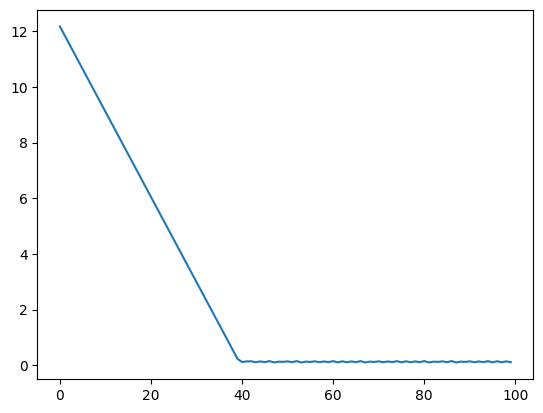

In [8]:
import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt

x = torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2])
y = torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6])
b = torch.rand([1],requires_grad = True)
w = torch.rand([1],requires_grad = True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w*x[j]
        y_p = a + b
        loss += torch.norm(y[j] - y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad

    w.grad = None
    b.grad = None

plt.plot(loss_list)

## Q2

After 0 epochs, w = 1.003000020980835,b = 1.0010000467300415,loss = 26.0
After 10 epochs, w = 1.0330002307891846,b = 1.0110005140304565,loss = 25.89999771118164
After 20 epochs, w = 1.0630004405975342,b = 1.0210009813308716,loss = 25.799999237060547
After 30 epochs, w = 1.0930006504058838,b = 1.0310014486312866,loss = 25.699996948242188
After 40 epochs, w = 1.1230008602142334,b = 1.0410019159317017,loss = 25.59999656677246
After 50 epochs, w = 1.153001070022583,b = 1.0510023832321167,loss = 25.499996185302734
After 60 epochs, w = 1.1830012798309326,b = 1.0610028505325317,loss = 25.399993896484375
After 70 epochs, w = 1.2130014896392822,b = 1.0710033178329468,loss = 25.299991607666016
After 80 epochs, w = 1.2430016994476318,b = 1.0810037851333618,loss = 25.199993133544922
After 90 epochs, w = 1.2730019092559814,b = 1.0910042524337769,loss = 25.09998893737793
Analytical Solution
After 0 epochs, w = 1.21,b = 1.07,loss = 26.0
After 10 epochs, w = 3.0319485874123804,b = 1.677316195804127,lo

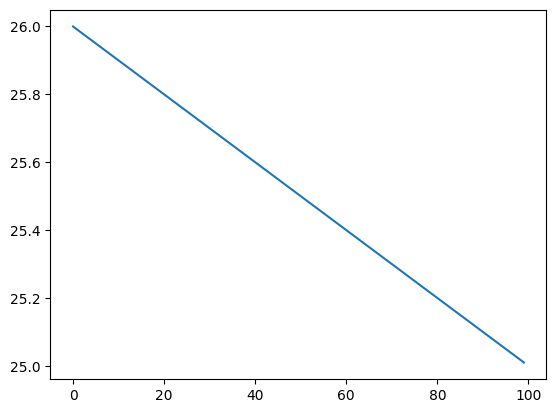

In [46]:
import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt

inp_x = np.array([2,4])
inp_y = np.array([20,40])

x = torch.tensor(inp_x)
y = torch.tensor(inp_y)
b = torch.tensor(1.,requires_grad = True)
w = torch.tensor(1.,requires_grad = True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w*x[j]
        y_p = a + b
        loss += torch.norm(y[j] - y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad
    
    w.grad = None
    b.grad = None
    if epochs%10==0:
            print("After {} epochs, w = {},b = {},loss = {}".format(epochs,w,b,loss))

def analytical(x,y,w,b):  
    loss = 0.0
    loss_list = []
    for epochs in range(100):
        for j in range(len(x)):
            y_p = w*x[j] + b
            loss += (y[j] - y_p)
        loss = loss/len(x)
        loss_list.append(loss.item())
        wgrad,bgrad = 0,0
        for i in range(len(x)):
            wgrad += (y_p - y[j])*(x[i])
            bgrad += (y_p - y[j])
        w -= 0.001*wgrad*2/len(x)
        b -= 0.001*bgrad*2/len(x)
        
        if epochs%10==0:
            print("After {} epochs, w = {},b = {},loss = {}".format(epochs,w,b,loss))

print("Analytical Solution")
analytical(inp_x,inp_y,1,1)

plt.plot(loss_list)

## Q3

After 0 epochs, The parameters are w=tensor([0.1098], requires_grad=True),b=tensor([0.6342], requires_grad=True), and loss =349.6600646972656
After 10 epochs, The parameters are w=tensor([0.3765], requires_grad=True),b=tensor([0.6565], requires_grad=True), and loss =342.49053955078125
After 20 epochs, The parameters are w=tensor([0.6409], requires_grad=True),b=tensor([0.6789], requires_grad=True), and loss =335.4383850097656
After 30 epochs, The parameters are w=tensor([0.9027], requires_grad=True),b=tensor([0.7012], requires_grad=True), and loss =328.52593994140625
After 40 epochs, The parameters are w=tensor([1.1611], requires_grad=True),b=tensor([0.7234], requires_grad=True), and loss =321.7823791503906
After 50 epochs, The parameters are w=tensor([1.4155], requires_grad=True),b=tensor([0.7456], requires_grad=True), and loss =315.24591064453125
After 60 epochs, The parameters are w=tensor([1.6647], requires_grad=True),b=tensor([0.7676], requires_grad=True), and loss =308.96524047851

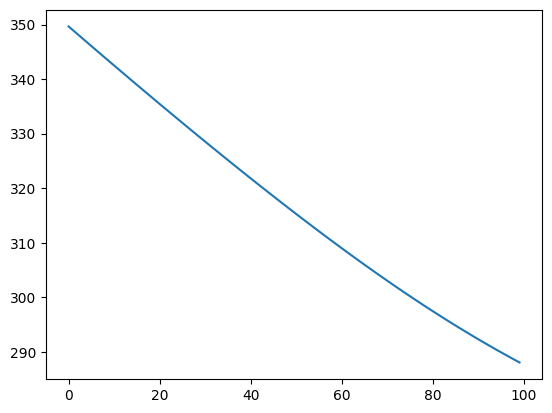

In [56]:
x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
learning_rate = torch.tensor(0.001)

class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1],requires_grad = True)
        self.b = torch.rand([1],requires_grad = True)
    def forward(self,x):
        return self.w*x + self.b
    def update(self):
        self.w -= learning_rate*self.w.grad
        self.b -= learning_rate*self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj,y_p):
    return (yj - y_p)**2

model = RegressionModel()
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x)
        loss += torch.norm(y[j] - y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        model.update()
    model.reset_grad()
    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

plt.plot(loss_list)

## Q4

[tensor([ 7., 12.,  5., 20.]), tensor([120., 180.,  40., 240.])]
[tensor([16.]), tensor([210.])]
After 0 epochs, The parameters are w=Parameter containing:
tensor([14.7438], requires_grad=True),b=Parameter containing:
tensor([1.2556], requires_grad=True), and loss =391.6531677246094
After 10 epochs, The parameters are w=Parameter containing:
tensor([13.1682], requires_grad=True),b=Parameter containing:
tensor([1.3986], requires_grad=True), and loss =29.74551773071289
After 20 epochs, The parameters are w=Parameter containing:
tensor([14.5739], requires_grad=True),b=Parameter containing:
tensor([1.8693], requires_grad=True), and loss =1245.2742919921875
After 30 epochs, The parameters are w=Parameter containing:
tensor([10.0122], requires_grad=True),b=Parameter containing:
tensor([1.8051], requires_grad=True), and loss =1457.087158203125
After 40 epochs, The parameters are w=Parameter containing:
tensor([13.5312], requires_grad=True),b=Parameter containing:
tensor([2.2920], requires_gra

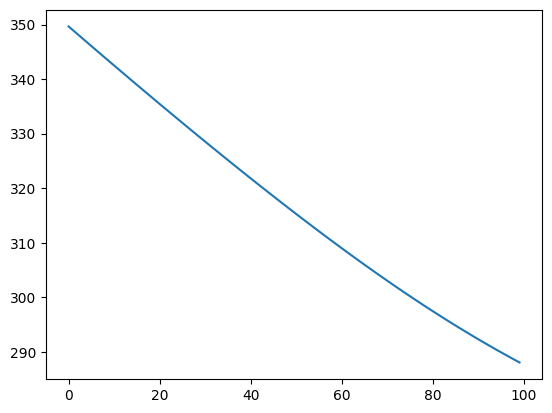

In [62]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=4,shuffle=True)

for data in iter(data_loader):
    print(data)
    
learning_rate = torch.tensor(0.001)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.003)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

plt.plot(loss_list)

In [ ]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=4,shuffle=True)

for data in iter(data_loader):
    print(data)
    
learning_rate = torch.tensor(0.001)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.003)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

plt.plot(loss_list)